In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
class LogisticRegression:
    def __init__(self, learning_rate =  0.01, iterations = 1000):
        self.lr = learning_rate
        self.iter = iterations
        self.weights = None
        self.bias = None
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.iter):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            dw = (1/n_samples)*np.dot(X.T, (y_pred-y))
            db = (1/n_samples)*np.sum(y_pred-y)
            self.weights -= self.lr*dw
            self.bias -= self.lr*db
    def predict_proba(self, X):
        X = np.array(X)
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)
    def predict(self, X):
        y_pred = self.predict_proba(X)
        return np.where(y_pred>=0.5,1,0)
    def accuracy(self, y_true, y_pred):
        return np.mean(y_true==y_pred)
    def plot_decision_boundary(self, model, X, y):
        x_min = X[:,0].min()-1
        x_max = X[:,0].max()+1
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = model.predict(grid).reshape(xx.shape)

        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, probs, alpha=0.3, cmap='bwr')
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
        plt.title("Logistic Regression Decision Boundary")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.grid(True)
        plt.show()

Predictions: [0 0 0 1 1 1]
Accuracy: 1.0


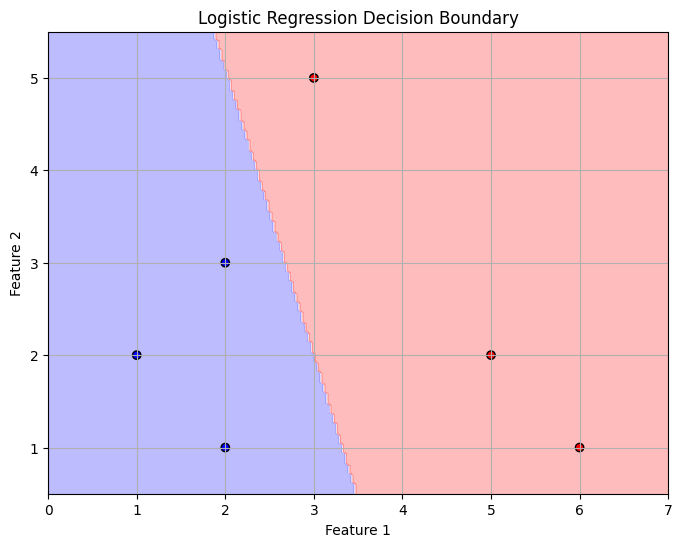

In [45]:
# Sample dataset
X = np.array([
    [1, 2],
    [2, 1],
    [2, 3],
    [3, 5],
    [5, 2],
    [6, 1]
])
y = np.array([0, 0, 0, 1, 1, 1])

# Train
model = LogisticRegression(learning_rate=0.1)
model.fit(X, y)

# Predict
y_pred = model.predict(X)
print("Predictions:", y_pred)
print("Accuracy:", model.accuracy(y, y_pred))
model.plot_decision_boundary(model, X, y)